In [1]:
%pip install --upgrade tiktoken
%pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import os
import json
import tiktoken
import pandas as pd

# Load the tokenizer
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

# Function to read and process JSON files in a folder
def process_json_folder(folder_path):
    # Initialize a list to store results
    tokens = []
    lengths = []
    dfs=[]
    total_tokens_list = []
    file_name_column = []

    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):

        if file_name.endswith('.json'):
            file_name_column.append(file_name)
            total_tokens = 0
            file_path = os.path.join(folder_path, file_name)
            # Read JSON data from file
            with open(file_path, 'r') as file:
                json_data = json.load(file)
            # Extract text from JSON data
            text_list = [item['text'] for item in json_data['0']['ocr']]

            # Encode each text string and determine the length of tokens
            for i, text in enumerate(text_list, 1):
                # Encode the text
                enc = encoding.encode(text)
                # Determine the length of tokens
                num_tokens = len(enc)
                # Store results
                total_tokens= total_tokens + num_tokens

                # Append total tokens to the list

            total_tokens_list.append(total_tokens)


    df = pd.DataFrame({'File Name': file_name_column, 'Total Tokens': total_tokens_list})
    print(df)
    return df
# Specify the folder containing the JSON files
folder_path = '/content/drive/MyDrive/test/test/'

# Process JSON files in the folder
df = process_json_folder(folder_path)



                                            File Name  Total Tokens
0     0fcec757bb8499b0f64c9cbdf2992c49.png.CACHE.json           943
1     f540e0faf891052c2dad7ad4a780b09f.png.CACHE.json           602
2     7f051d85b3b866d0b2b4c583c29e0fdd.pdf.CACHE.json           750
3     ba6b814dff15b8ac3855c07b2e66dcb2.jpg.CACHE.json           372
4     3545f00afbba4684a7734ff636637f13.pdf.CACHE.json           663
..                                                ...           ...
275   adbb9df0c261558406efcb6bc303f777.png.CACHE.json           278
276  2a8a6aaa0e025f7d83290c2b976831d6.jpeg.CACHE.json           127
277   edebae2f7d8f67c2a1412a02a9ec0220.png.CACHE.json           185
278   45aa71af3617245ddb9c4ab23b443290.jpg.CACHE.json          1034
279   21ce753349be82d5c1c4ff26057f6158.png.CACHE.json           124

[280 rows x 2 columns]


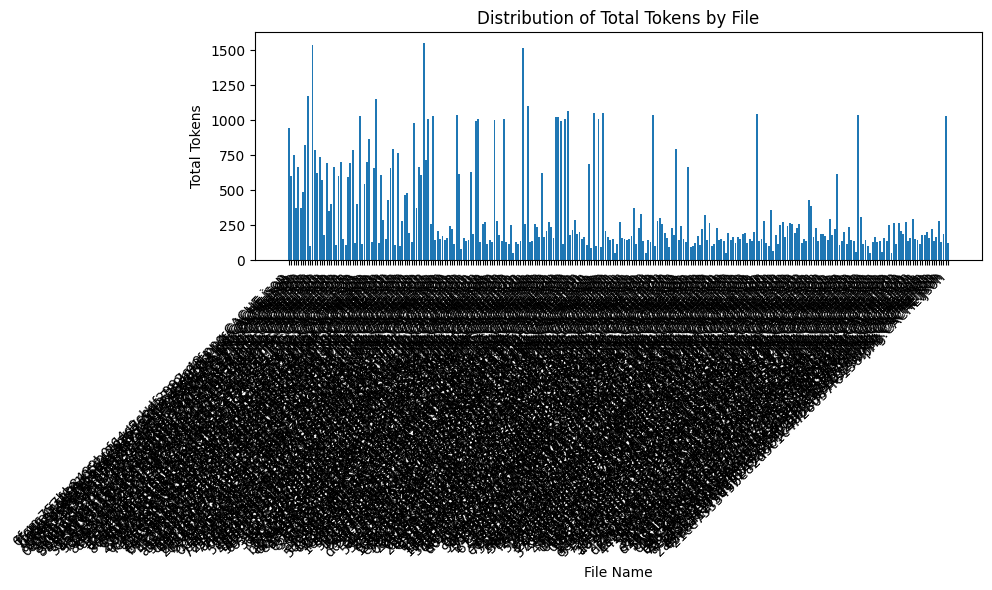

In [50]:
import matplotlib.pyplot as plt

# Plot filename against total tokens
plt.figure(figsize=(10, 6))
plt.bar(df['File Name'], df['Total Tokens'])
plt.xlabel('File Name')
plt.ylabel('Total Tokens')
plt.title('Distribution of Total Tokens by File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

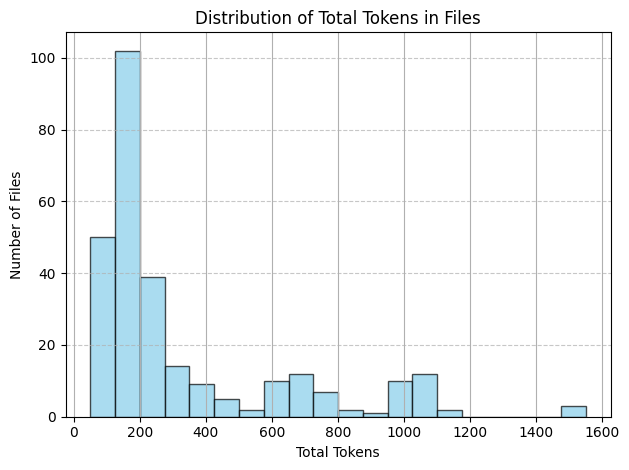

In [51]:
# Plot histogram showing the number of files for each number of tokens
plt.figure(figsize=(10, 6))
df.hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Total Tokens')
plt.ylabel('Number of Files')
plt.title('Distribution of Total Tokens in Files')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()